<a href="https://colab.research.google.com/github/shiktr1785/isss-ai-python/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Metaheuristics for Traveling Salesman Problem
### Shikhar Mani Tripathi

The main objective of this assignment is to implement a metaheuristic algorithm in Python to solve the Traveling Salesman Problem (TSP). The TSP is an optimization problem that seeks to determine the most efficient route to visit each node exactly once and return to the starting point. This problem is recognized as a complex combinatorial challenge, as multiple solutions exist. Optimization involves analyzing all possible solutions that meet the constraints of the problem to identify the most optimal solution with the lowest resource cost.

>Metaheuristics are powerful tools for solving complex optimization problems, especially when traditional methods are infeasible or inefficient. Although they do not guarantee optimal solutions, they can often deliver high-quality solutions in a reasonable timeframe, making them invaluable in the industry. A key consideration in these algorithms is the trade-off between solution quality, computational cost, and parameter tuning.

For the Traveling Salesman Problem (TSP) optimization, there are four available options to choose from. In this case, I will be using a Genetic Algorithm to tackle the optimization challenge.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def generate_cities(n_cities, range_min=0, range_max=100):

  # Generate random city coordinates within a given range.
  return np.random.uniform(range_min, range_max, size=(n_cities, 2))

In [13]:
def compute_distance_matrix(cities):

  # Compute the euclidian distance between the cities.

  n = len(cities)
  distance_matrix = np.zeros((n, n))

  for i in range(n):
    for j in range(n):
      distance_matrix[i,j] = np.linalg.norm(cities[i] - cities[j])
  return distance_matrix

In [14]:
def evaluate_tour_cost(tour, distance_matrix):

  # Calculate the total cost for the distance of the tour.
  cost = 0

  for i in range(len(tour)):
    cost += distance_matrix[tour[i], tour[(i+1) % len(tour)]]
  return cost

## Genetic Algorithm

In [15]:
# @title Generating Initial Population

def generate_initial_population(pop_size, num_cities):

  population = []

  for _ in range(pop_size):
    tour = np.random.permutation(num_cities)
    population.append(tour)
  return population

In [16]:
# @title Fitness Evaluation

def evaluate_fitness(population, distance_matrix):

  fitness = []

  for tour in population:
    cost = evaluate_tour_cost(tour, distance_matrix)
    fitness.append(cost)
  return fitness

In [17]:
# @title Roulette Wheel Selection

def roulette_wheel_selection(population, fitness):

  # Selecting parent using roulette wheel selection
  fitness = np.array(fitness)
  probabilities = 1 / fitness
  probabilities /= probabilities.sum()

  # Select an individual based on probability
  selected_index = np.random.choice(len(population), p=probabilities)
  return population[selected_index]

## Plot and Visualisation

In [18]:
def plot_cities_and_tour(cities, tour):

  # Visualise cities and optional tour path

  plt.figure(figsize=(10,6))
  plt.scatter(cities[:, 0], cities[:, 1], color='blue', label='Cities')

  # Add labels to cities
  for i, (x, y) in enumerate(cities):
      plt.text(x, y, str(i), fontsize=12, color='red', ha='right', va='bottom')

  # If a tour is provided, plot the path
  if tour is not None:
    for i in range(len(tour) - 1):
      plt.plot([cities[tour[i], 0], cities[tour[i+1], 0]],
              [cities[tour[i], 1], cities[tour[i+1], 1]],
              color='red', linestyle='-', linewidth=2)

      # Add return to starting city

      plt.plot([cities[tour[-1]][0], cities[tour[0]][0]],
              [cities[tour[-1]][1], cities[tour[0]][1]],
              color='orange', linestyle='-', linewidth=2)

  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("TSP Cities and Optional Tour")
  plt.grid()
  plt.show()

## Driver Function

Cities:
 [[37.87197543 36.43900199]
 [92.20082791  8.75756814]
 [35.13964782  2.94942407]
 [84.64775088 98.91932365]
 [44.41841321  8.94072967]
 [70.94684843 96.79461961]
 [ 4.59421803 33.0503798 ]
 [ 6.36415827 29.22767115]
 [36.40073891 80.39783412]
 [53.17161287 15.46089588]]

Distance Matrix:
 [[  0.          60.97447     33.60085481  78.04975185  28.26677959
   68.82403506  33.44984153  32.32252828  43.98344528  25.96458823]
 [ 60.97447      0.          57.35601809  90.47757252  47.78276575
   90.56629658  90.91236876  88.24374749  90.80736557  39.60068471]
 [ 33.60085481  57.35601809   0.         107.9873784   11.04496401
  100.44439428  42.88462215  38.96889873  77.45867654  21.94740737]
 [ 78.04975185  90.47757252 107.9873784    0.          98.56240148
   13.86467075 103.66911732 104.81053048  51.67997425  89.19672881]
 [ 28.26677959  47.78276575  11.04496401  98.56240148   0.
   91.77180315  46.5536438   43.12408044  71.90549964  10.91471812]
 [ 68.82403506  90.56629658 100.44

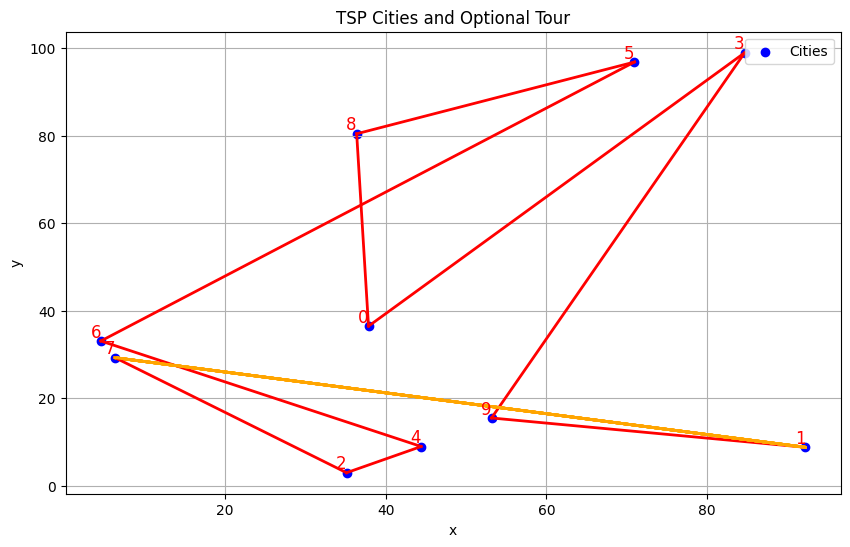

Tour 2: [8 9 2 5 6 1 3 4 7 0] - Cost: 680.8527042510946


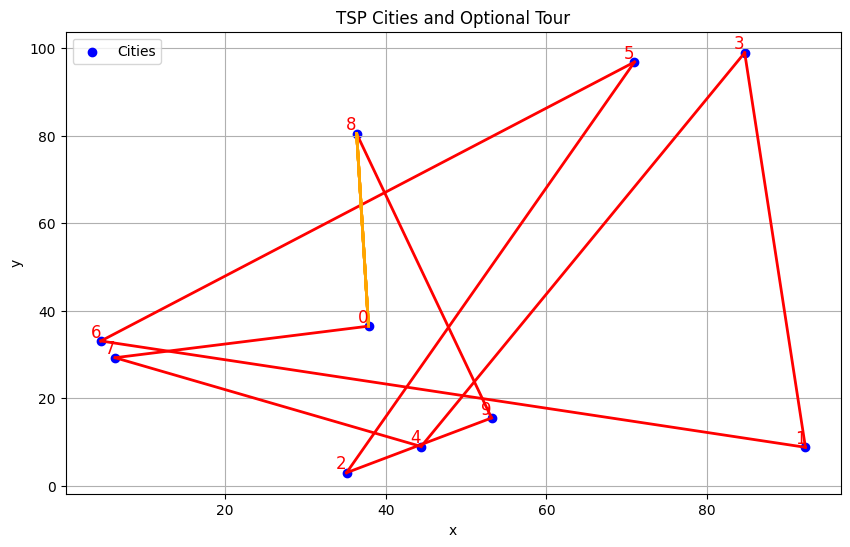

Tour 3: [9 7 6 1 2 4 3 0 5 8] - Cost: 563.059608518995


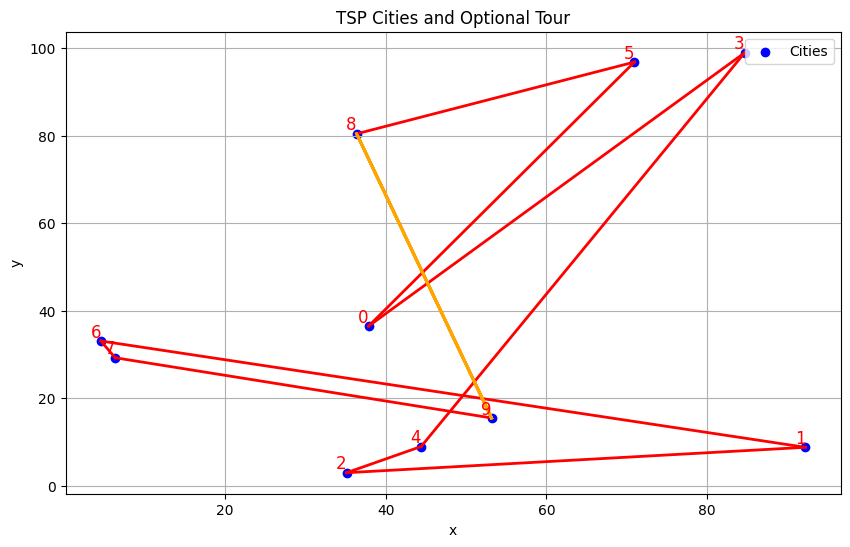

Tour 4: [8 5 0 3 7 1 4 2 6 9] - Cost: 598.6117817650213


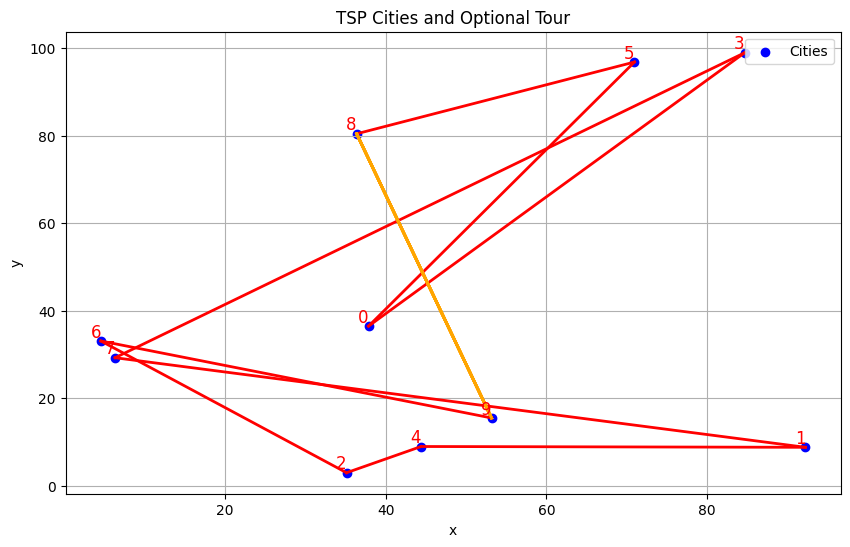

Tour 5: [8 4 5 3 2 0 7 1 9 6] - Cost: 587.999916442805


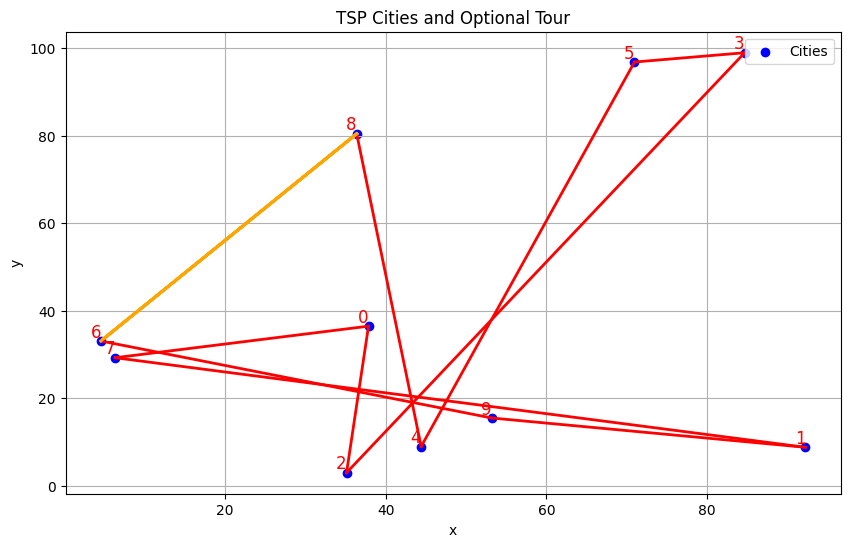


Selected Tour:
 [8 9 2 5 6 1 3 4 7 0]


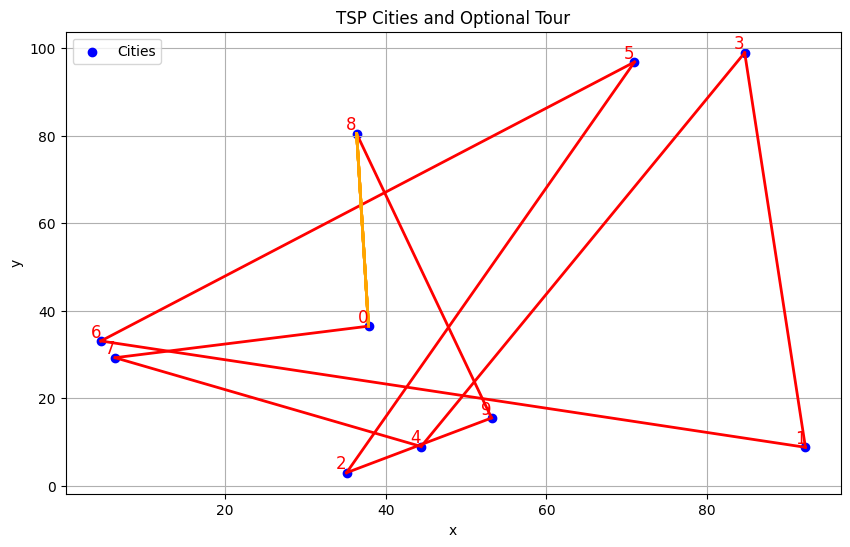

In [20]:
if __name__ == "__main__":

  # Generate Cities
  cities = generate_cities(10)
  print("Cities:\n", cities)

  # Compute distance matrix
  distance_matrix = compute_distance_matrix(cities)
  print("\nDistance Matrix:\n", distance_matrix)

  # Parameters
  pop_size = 5
  num_cities = len(cities)

  # Generate initial Population
  population = generate_initial_population(pop_size, num_cities)
  print("\nInitial Population:\n", population)

  # Evalute fitness of the population
  fitness = evaluate_fitness(population, distance_matrix)
  print("\nFitness:\n", fitness)

  #output of initial population and fitness score
  for i, (tour, cost) in enumerate(zip(population, fitness)):
    print(f"Tour {i+1}: {tour} - Cost: {cost}")
    plot_cities_and_tour(cities, tour)


  selection = roulette_wheel_selection(population, fitness)
  print("\nSelected Tour:\n", selection)
  plot_cities_and_tour(cities, selection)